# Debugging code

This notebook serves as  testbed for the code written in the separate python files. Here I test the different functions with their inputs and use possible error messages to debug. 

In [1]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# import code
from plotting import plotting
from riemann import riemann

In [2]:
# initialize necessary classes

mu = 1.0 # set to 1 for convenience
T = 1.0 # set to 1 for convenience

# Riemann initial conditions
rho_L = 1.  # x < 0
rho_R = 1.  # x > 0

v_L = 1
v_R = 0.

# insert momentum in U vector
U_L = (rho_L, v_L*rho_L)
U_R = (rho_R, v_R*rho_R)

plots = plotting(rho_L, rho_R, v_L, v_R)

## Plotting class
Here I will test the different plotting functionality I have added to this class.

### Plot Hugoniot loci and integral curves

In [ ]:
# plot hugoniot locus for left and right states
plots.plot_2_hugoniot_loci(U_L, U_R, intermediate=True)

In [ ]:
# we plot the Hugoniot locus for a given state U
title = "Hugoniot locus left"
plots.plot_Hugoniot_locus(U_L, title=title)

In [ ]:
# plot integral curves for left state
plots.plot_integral_curves(U_L, title='Integral curves Left')

In [ ]:
# Plot integral curves for right state
plots.plot_integral_curves(U_R, title='Integral curves Right')

In [ ]:
# Plot both Hugoniot loci and integral curves
plots.plot_integral_hugoniot(np.array([1,1]), title='Hugoniot locus vs. integral curves',
                   name='integral_hugoniot')

In [ ]:
# Plot both Hugoniot loci and integral curve for left state
plots.plot_integral_hugoniot(U_L, 
                             title='Hugoniot locus vs. integral curve: Left',
                             name='Hugoniot_integral_left')

In [ ]:
# Plot both Hugoniot loci and integral curve for right state
plots.plot_integral_hugoniot(U_R, 
                             title='Hugoniot locus vs. integral curve: Right',
                             name='Hugoniot_integral_right')

In [ ]:
# Plot the derivatives on the Hugoniot loci for left state
plots.plot_Hugoniot_locus_derivative(U_L,
                                    name='Hugoniot_curve_left')

In [ ]:
# Plot the derivatives on the Hugoniot loci for right state
plots.plot_Hugoniot_locus_derivative(U_R,
                                    name='Hugoniot_curve_right')

In [ ]:
# Plot momentum and shock speed parametrized for left state
plots.Plot_Rankine_hugoniot_derivative(U_L,
                                      name='Hugoniot_rankine_derivative_left')

In [ ]:
# Plot momentum and shock speed parametrized for right state
plots.Plot_Rankine_hugoniot_derivative(U_R,
                                      name='Hugoniot_rankine_derivative_right')

### Run tests of notes

In this part we run the tests that are also done in the lecture notes. We find similar results. 

In [10]:
def solve(rho_L, rho_R, v_L, v_R, name):
    plots = plotting(rho_L, rho_R, v_L, v_R)
    plots.full_solution(name=name)

{'1-wave': 'shock', '2-wave': 'shock'}


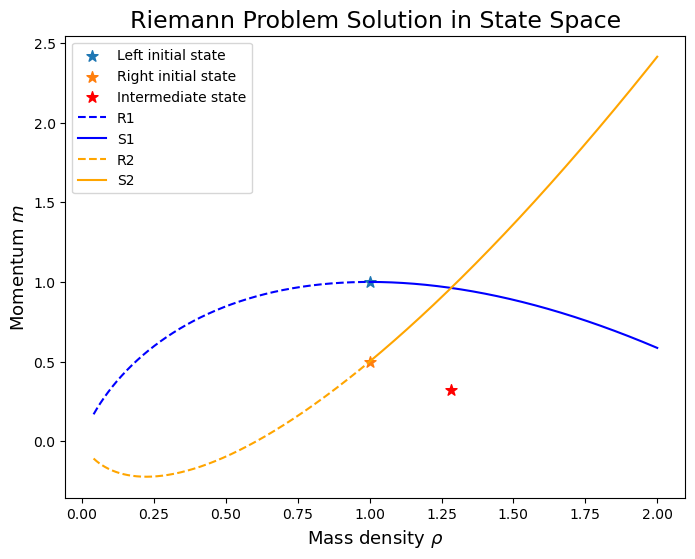

In [11]:
# test for syntax errors
solve(1,1,1, 0.5, 'test_syntax')

{'1-wave': 'rarefaction', '2-wave': 'shock'}


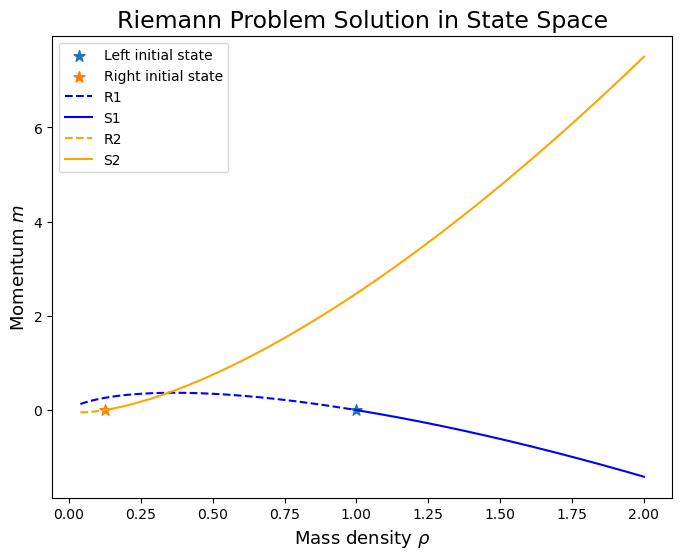

In [12]:
# test 1

solve(1, 0.125, 0, 0, 'test1_statespace')

{'1-wave': 'shock', '2-wave': 'shock'}


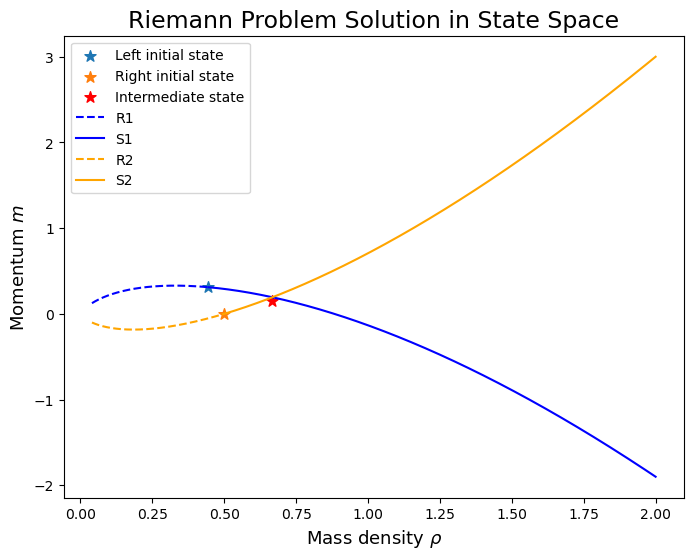

In [13]:
# test 2
solve(0.445, 0.5, 0.31061/0.445, 0, 'test2_statespace')

{'1-wave': 'rarefaction', '2-wave': 'rarefaction'}


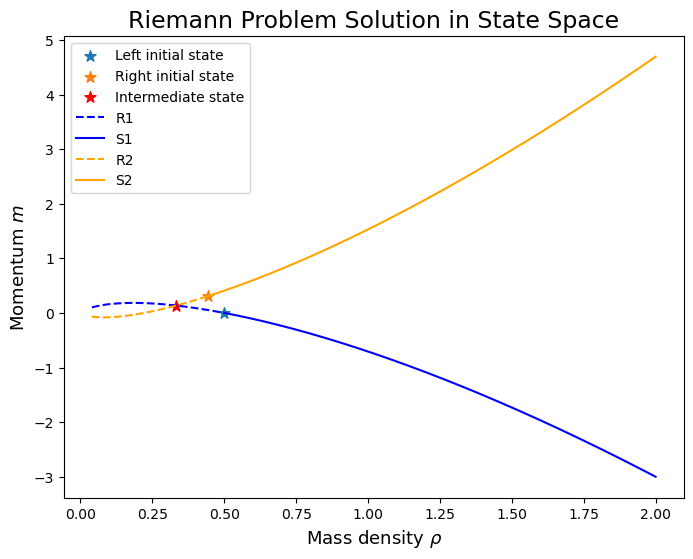

In [14]:
# Test 3
solve(0.5, 0.445, 0, 0.31061/0.445, 'test3_statespace')

### Plotting numerical solution

In [ ]:
# numerical solution for tvdlf, minmod limiter and twostep scheme
plots.plot_numerical_solution('tvdlf', 
                              'minmod', 
                              'twostep',
                              nx=100, 
                              t_end=0.06
                            )

In [ ]:
# test maccormack scheme
plots.plot_numerical_solution('maccormack', 
                              'minmod', 
                              'twostep',
                              nx=100, 
                              t_end=0.004
                            )

In [ ]:
# test upwind scheme
plots.plot_numerical_solution('upwind', 
                              'minmod', 
                              'twostep',
                              nx=100, 
                              t_end=0.06
                            )

Here we test the nuerical solution for the three test cases. 

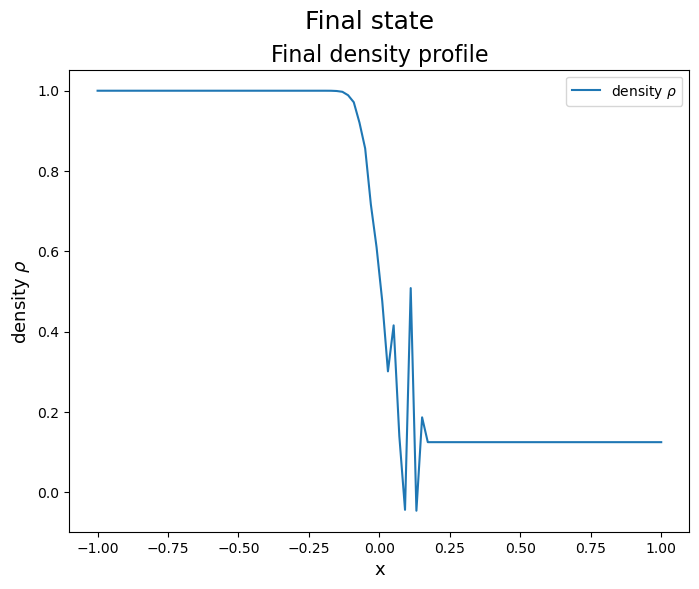

In [5]:
# test 1
rho_L = 1
m_L = 0 

rho_R = 0.125
m_R = 0

v_L = m_L/rho_L
v_R = m_R/rho_R

# Initialize class with correct numbers
test1 = plotting(rho_L, rho_R, v_L, v_R)

# Run
test1.plot_numerical_solution('tvdlf',
                             'minmod',
                              'twostep',
                              t_end=0.05
                             )

## solver class
The plotting class contains different plotting functions, which are all demonstrated above. The actual calculations are done by the class called ''riemann'''